# Importing the datasets

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
books = pd.read_csv('Datasets/BX_Books.csv',delimiter=';', encoding='ISO-8859-1')

In [307]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [308]:
users = pd.read_csv('Datasets/BX-Users.csv',delimiter=';', encoding='ISO-8859-1')

In [309]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [310]:
rating = pd.read_csv('Datasets/BX-Book-Ratings.csv',delimiter=';', encoding='ISO-8859-1')

In [311]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [312]:
books.shape

(271379, 8)

In [313]:
users.shape

(278858, 3)

In [314]:
rating.shape

(1149780, 3)

## Merging the 3 datasets

In [316]:
book_rec = pd.merge(users, rating , on = 'User-ID')
book_rec = pd.merge(books, book_rec , on='ISBN')

In [317]:
book_rec.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",NaN,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",NaN,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",NaN,0


In [318]:
book_rec.shape

(1031175, 12)

# EDA

### Outlier Detection

In [321]:
# Define a function to calculate and count outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)  # 25th percentile (Q1)
    Q3 = column.quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile range (IQR)
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Return the number of outliers
    return len(outliers)

# Calculate and display the number of outliers for each numeric column
year_outliers = count_outliers(book_rec['Year-Of-Publication'])
age_outliers = count_outliers(book_rec['Age'])  # If you still have 'Age' column
rating_outliers = count_outliers(book_rec['Book-Rating'])

print(f"Number of outliers in Year Of Publication: {year_outliers}")
print(f"Number of outliers in Age: {age_outliers}")  # If the 'Age' column exists
print(f"Number of outliers in Book Rating: {rating_outliers}")

Number of outliers in Year Of Publication: 44275
Number of outliers in Age: 7970
Number of outliers in Book Rating: 0


### Unique values in each column

In [322]:
for col in book_rec.columns:
    print({col})
    print(book_rec[col].unique())

{'ISBN'}
['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']
{'Book-Title'}
['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]
{'Book-Author'}
['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']
{'Year-Of-Publication'}
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984
    0 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973
 1972 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950
 1967 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947
 1945 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927
 1931 1914 2050 19

### Heatmap for missing values

<Axes: >

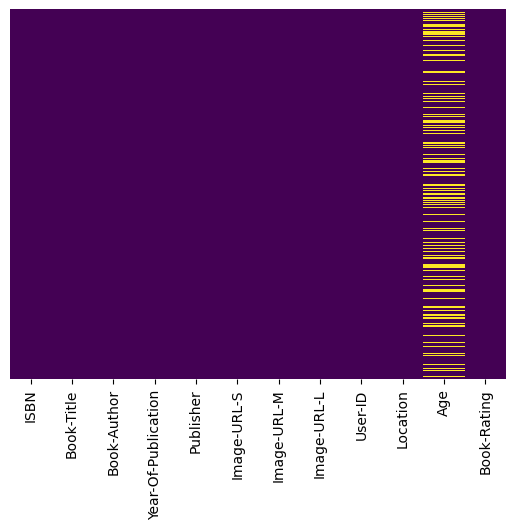

In [323]:
sns.heatmap(book_rec.isnull(), yticklabels=False, cbar=False,  cmap='viridis' )

### Plot distribution of Book Ratings

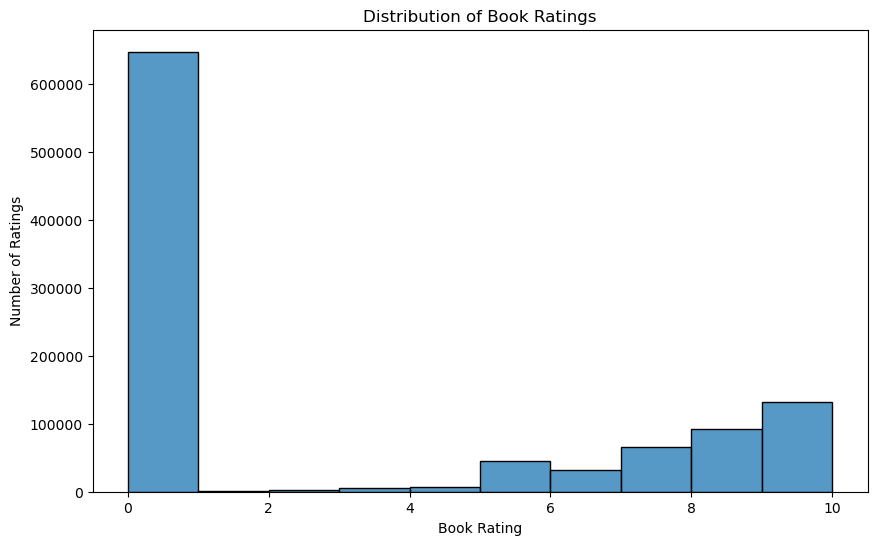

In [324]:
# Plot distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(book_rec['Book-Rating'], bins=10, kde=False)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.show()

### Top most preferred Authors

Book-Author
Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
Dean R. Koontz         4313
Tom Clancy             4036
Danielle Steel         3726
Sue Grafton            3457
Janet Evanovich        3350
Name: Book-Rating, dtype: int64


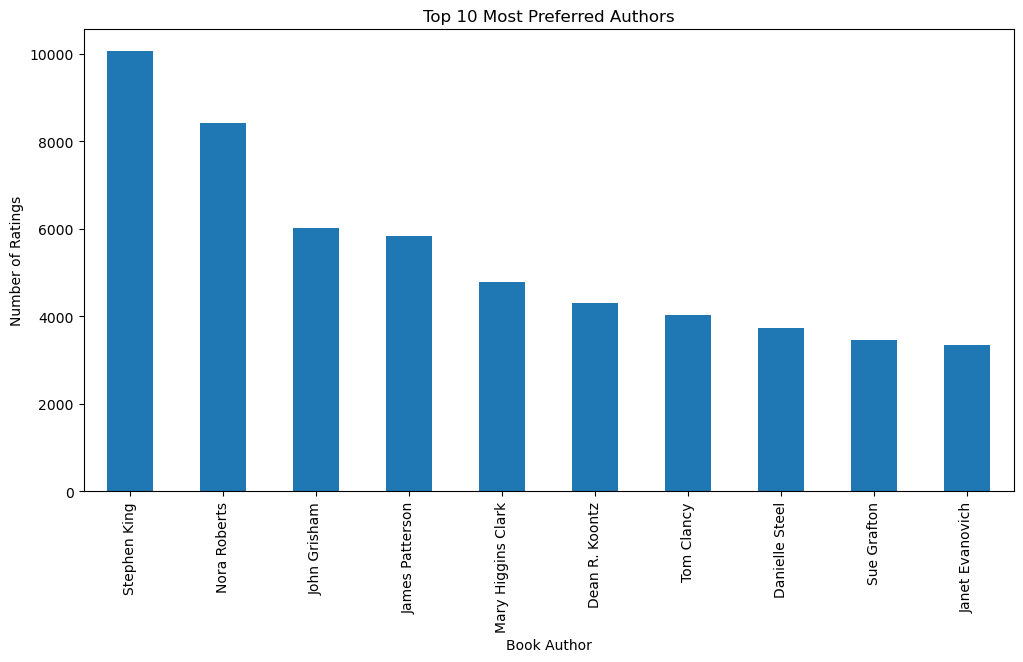

In [325]:
# Grouping by Book-Author to see the number of ratings each author has received
author_preference = book_rec.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)

# Display top 10 most preferred authors
print(author_preference.head(10))

# Plot the top 10 authors
plt.figure(figsize=(12, 6))
author_preference.head(10).plot(kind='bar')
plt.title('Top 10 Most Preferred Authors')
plt.xlabel('Book Author')
plt.ylabel('Number of Ratings')
plt.show()

### Top most preffered Books

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels & Demons                                     670
Name: Book-Rating, dtype: int64


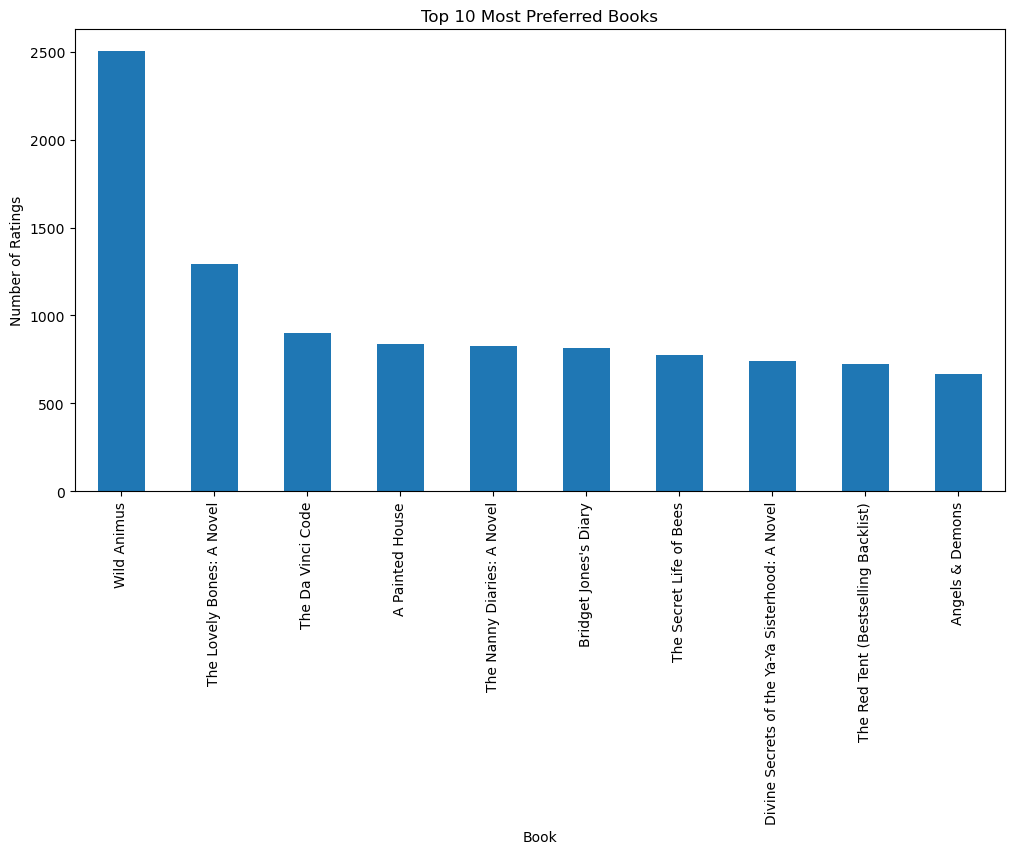

In [326]:
# Grouping by Book-rating to see the number of ratings each book has received
book_preference = book_rec.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)

# Display top 10 most preferred books
print(book_preference.head(10))

# Plot the top 10 books
plt.figure(figsize=(12, 6))
book_preference.head(10).plot(kind='bar')
plt.title('Top 10 Most Preferred Books')
plt.xlabel('Book')
plt.ylabel('Number of Ratings')
plt.show()

### Publisher with top rated books

Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25029
Bantam Books                23600
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: Book-Rating, dtype: int64


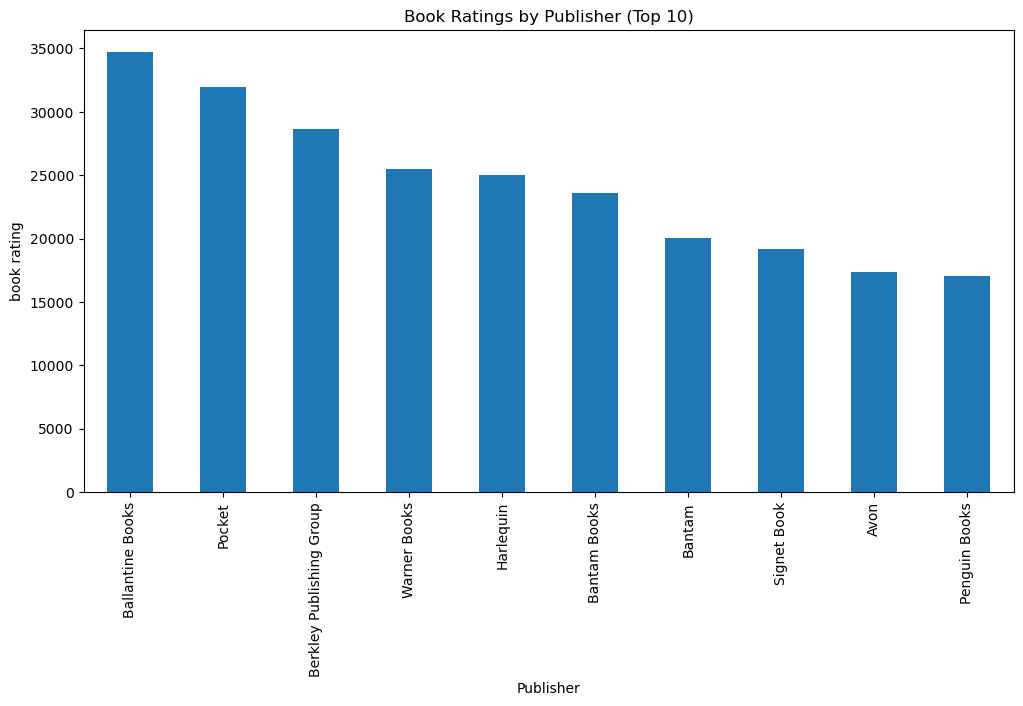

In [327]:
# Grouping by Publisher based on book ratings
country_preference = book_rec.groupby('Publisher')['Book-Rating'].count().sort_values(ascending=False)

# Display top 10 publishers with the most rating
print(country_preference.head(10))

# Plot the top 10 publishers
plt.figure(figsize=(12, 6))
country_preference.head(10).plot(kind='bar')
plt.title('Book Ratings by Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('book rating')
plt.show()

### Years with the most no of books published

Year-Of-Publication
2002    91801
2001    79803
1999    75195
2003    72539
2000    72334
1998    64209
1997    59361
1996    58826
1995    54093
1994    46444
Name: ISBN, dtype: int64


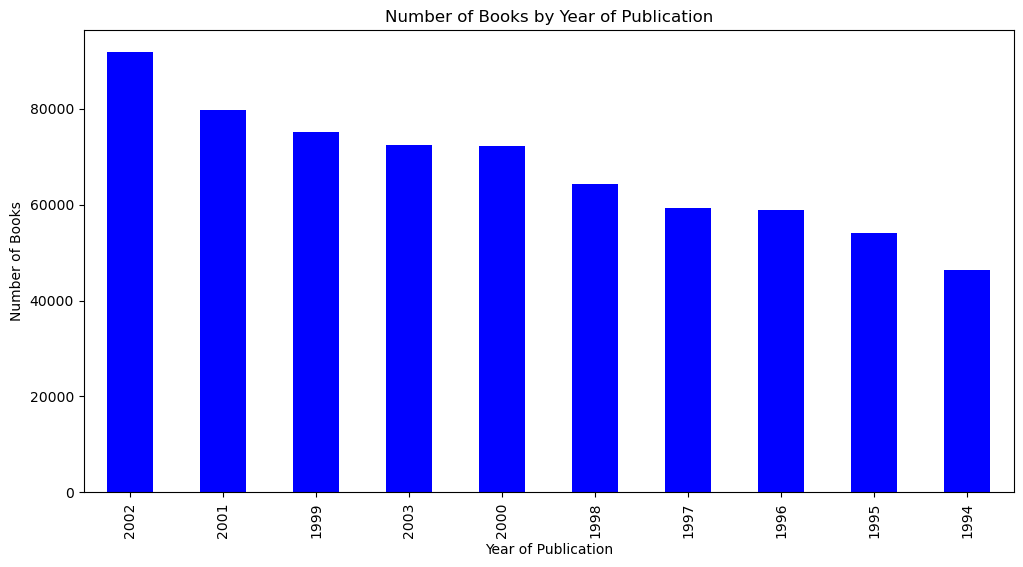

In [328]:
# Group by Year-Of-Publication to count the number of books
books_per_year = book_rec.groupby('Year-Of-Publication')['ISBN'].count().sort_values(ascending=False)

# Display the top 10 years with the most books
print(books_per_year.head(10))

# Plot the number of books per year
plt.figure(figsize=(12, 6))
books_per_year.head(10).plot(kind='bar', color='blue')
plt.title('Number of Books by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.show()

### Boxplot for numerical values to see the outliers

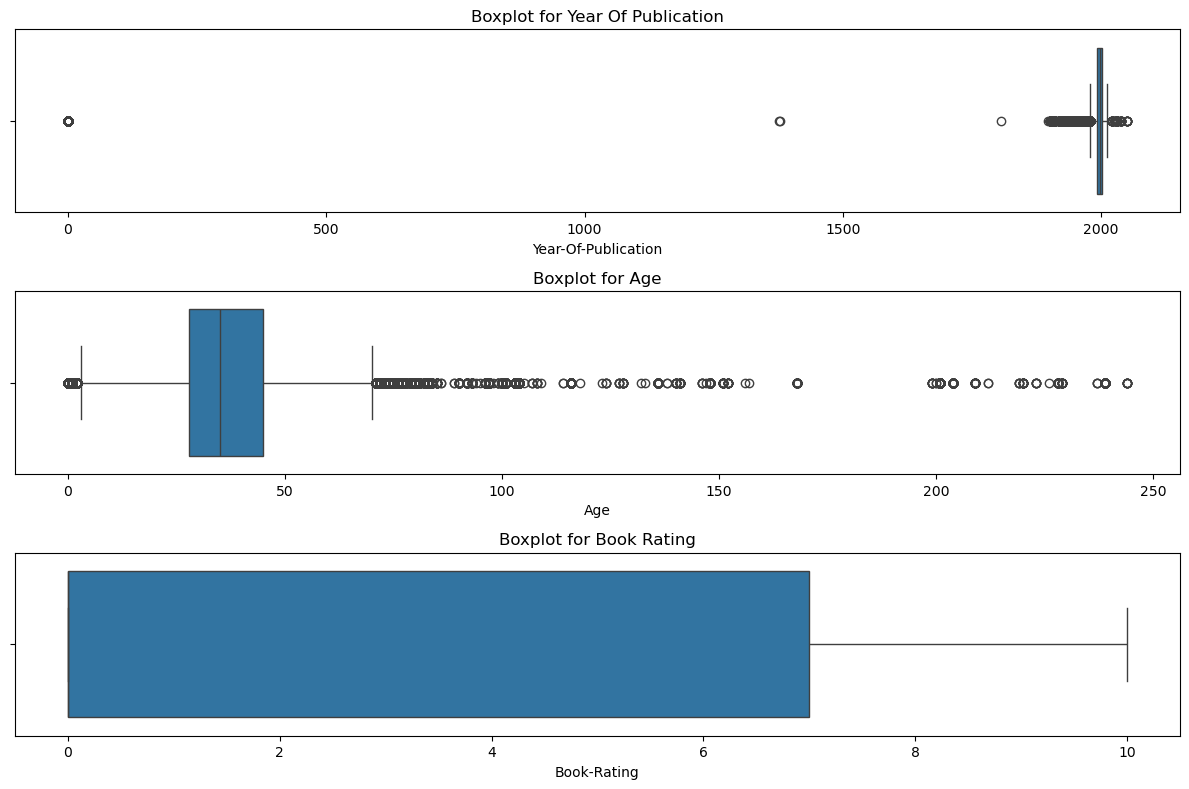

In [329]:
# Plot the boxplots for each numeric column
plt.figure(figsize=(12, 8))

# Boxplot for 'Year-Of-Publication'
plt.subplot(3, 1, 1)
sns.boxplot(x=book_rec['Year-Of-Publication'])
plt.title('Boxplot for Year Of Publication')

# Boxplot for 'Age' (If you still have this column, else skip)
plt.subplot(3, 1, 2)
sns.boxplot(x=book_rec['Age'])
plt.title('Boxplot for Age')

# Boxplot for 'Book-Rating'
plt.subplot(3, 1, 3)
sns.boxplot(x=book_rec['Book-Rating'])
plt.title('Boxplot for Book Rating')

# Show the plots
plt.tight_layout()
plt.show()

### Finding skewness of the age distribution

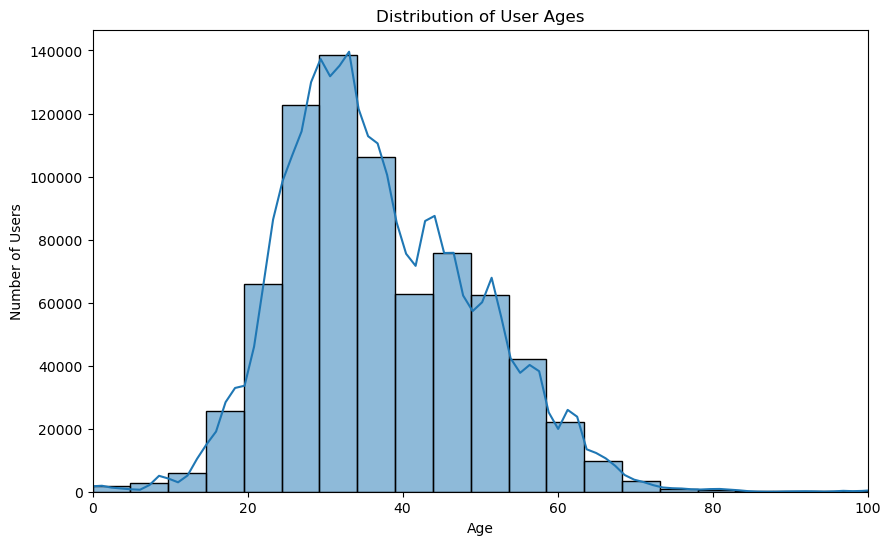

In [330]:
#Distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(book_rec['Age'].dropna(), bins=50, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xlim(0, 100)
plt.show()

In [331]:
# Descriptive statistics
age_stats = book_rec['Age'].describe()
print(age_stats)

# Alternatively, you can just print mean and median
mean_age = book_rec['Age'].mean()
median_age = book_rec['Age'].median()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")


count    753330.000000
mean         37.397719
std          14.098189
min           0.000000
25%          28.000000
50%          35.000000
75%          45.000000
max         244.000000
Name: Age, dtype: float64
Mean Age: 37.39771945893566
Median Age: 35.0


In [332]:
skewness = book_rec['Age'].skew()
print(f"Skewness: {skewness}")
#since the skewness we get is postive use median

Skewness: 2.788786192915863


In [333]:
# Descriptive statistics
age_stats = book_rec['Year-Of-Publication'].describe()
print(age_stats)

# Alternatively, you can just print mean and median
mean_Year = book_rec['Year-Of-Publication'].mean()
median_Year = book_rec['Year-Of-Publication'].median()

print(f"Mean Year-Of-Publication: {mean_Year}")
print(f"Median Year-Of-Publication: {median_Year}")

count    1.031175e+06
mean     1.968194e+03
std      2.311048e+02
min      0.000000e+00
25%      1.992000e+03
50%      1.997000e+03
75%      2.001000e+03
max      2.050000e+03
Name: Year-Of-Publication, dtype: float64
Mean Year-Of-Publication: 1968.1938991926686
Median Year-Of-Publication: 1997.0


# Data Preprocessing

In [335]:
book_rec.shape

(1031175, 12)

In [336]:
book_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031175 non-null  object 
 1   Book-Title           1031175 non-null  object 
 2   Book-Author          1031173 non-null  object 
 3   Year-Of-Publication  1031175 non-null  int64  
 4   Publisher            1031173 non-null  object 
 5   Image-URL-S          1031175 non-null  object 
 6   Image-URL-M          1031175 non-null  object 
 7   Image-URL-L          1031175 non-null  object 
 8   User-ID              1031175 non-null  int64  
 9   Location             1031175 non-null  object 
 10  Age                  753330 non-null   float64
 11  Book-Rating          1031175 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 94.4+ MB


## Checking for missing values

In [338]:
book_rec.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 0
User-ID                     0
Location                    0
Age                    277845
Book-Rating                 0
dtype: int64

### Filling missing values in age using median imputation since it has a positive skewness

In [340]:
median_age = book_rec['Age'].median()
book_rec['Age'].fillna(median_age, inplace=True)


C:\Users\94773\AppData\Local\Temp\ipykernel_608\3578681513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_rec['Age'].fillna(median_age, inplace=True)


In [341]:
#Change the data type to int
book_rec['Age'] = book_rec['Age'].astype(int)

### filling missing values in Publisher and Book Author with' unknown'

In [343]:
# Display rows where 'Publisher' is missing (NaN)
missing_publisher_rows = book_rec[book_rec['Publisher'].isna()]

# Display the result
missing_publisher_rows


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
824230,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,98391,"morrow, georgia, usa",52,9
824539,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,98391,"morrow, georgia, usa",52,9


In [344]:
# Impute missing Publisher values with 'Unknown Publisher'
book_rec['Publisher'].fillna('Unknown Publisher', inplace=True)


C:\Users\94773\AppData\Local\Temp\ipykernel_608\1826619563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_rec['Publisher'].fillna('Unknown Publisher', inplace=True)


In [345]:
# Impute missing Authors values with 'Unknown Author'
book_rec['Book-Author'].fillna('Unknown Author', inplace=True)


C:\Users\94773\AppData\Local\Temp\ipykernel_608\3291138553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_rec['Book-Author'].fillna('Unknown Author', inplace=True)


In [346]:
book_rec.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Location               0
Age                    0
Book-Rating            0
dtype: int64

### Handling outliers in age

In [348]:
book_rec.loc[book_rec['Age'] > 80, 'Age'] = 35    #outliers with age grater than 80 are substituted with median 
book_rec.loc[book_rec['Age'] < 10, 'Age'] = 35    #outliers with age less than 10 years are substitued with median
book_rec['Age'] = book_rec['Age'].fillna(35)      #filling null values with median
book_rec['Age'] = book_rec['Age'].astype(int) 

In [349]:
book_rec['Age'].unique()

array([18, 35, 49, 30, 36, 29, 60, 27, 71, 40, 53, 65, 46, 47, 26, 56, 37,
       39, 25, 31, 41, 20, 58, 42, 38, 52, 21, 22, 34, 33, 19, 57, 51, 32,
       62, 45, 74, 44, 43, 68, 54, 55, 24, 59, 28, 70, 17, 23, 48, 14, 50,
       16, 61, 15, 66, 67, 72, 64, 75, 13, 76, 69, 73, 63, 77, 79, 12, 80,
       78, 11, 10])

### Handling outliers in book published year

In [390]:
book_rec.loc[book_rec['Year-Of-Publication'] > 2024, 'Year-Of-Publication'] = 1997
book_rec.loc[book_rec['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 1997

In [392]:
book_rec['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 2024, 1376],
      dtype=int64)

### Getting rid of the Location beacuse of too many inconsitance data

In [395]:
book_rec.drop(['Location'], axis=1, inplace=True)

### Dropping less informative columns

In [398]:
book_rec.drop(['Image-URL-S','Image-URL-L'], axis=1,inplace=True)

In [400]:
book_rec.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,18,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,35,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,49,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,35,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,35,0


### Check for duplicate rows in the entire merged dataset

In [404]:
duplicate_rows = book_rec[book_rec.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


### Standardize author names in the DataFrame

In [406]:
book_rec['Book-Author'] = book_rec['Book-Author'].str.strip().str.lower()

### Removing special caharacters in Book Title

In [408]:
import re
special_characters_pattern = r'[!@#$%^&*()\-_=+[\]{};:,./<>?\|`~]'
book_rec['Book-Title'] = book_rec['Book-Title'].apply(lambda x: re.sub(special_characters_pattern, '', x))

### Remove rows with 0 Book-Rating

In [410]:
book_rec = book_rec[book_rec['Book-Rating'] != 0]

In [412]:
book_rec.shape

(383852, 9)

## Save the cleaned DataFrame

In [418]:
book_rec.to_csv('cleaned_book_store_data.csv', index=False)